# Welcome to the Sentiment Analysis Project.

# loading important library


In [ ]:
# important url for word2vec = "https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g"
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')
# dirictory to data file
dir = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/data.csv"
dir_models = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/models"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%%capture
!pip install tensorflow_text
!pip install transformers
!pip install keras_preprocessing
!pip install wordcloud

In [11]:
# importing tensorflow and keras
# import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras import backend as K
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence, text
from keras.models import Sequential
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
# from keras.layers import Dense, Activation, Dropout

# from keras.utils import np_utilts
from keras.layers import Bidirectional, SpatialDropout1D

from keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow_text as text
# gensim imports
from gensim.models import KeyedVectors
import re
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

import joblib
import nltk as nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from nltk.tokenize import word_tokenize

# sklearn imports
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score,  confusion_matrix, make_scorer  # classification Metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
import plotly.express as px
import pandas as pd
from tensorflow.keras.models import model_from_json

# Hugging Face Transformers
from transformers import (pipeline , BertTokenizer,
                          TFBertForSequenceClassification,
                          InputExample, InputFeatures ,
                         AutoTokenizer, TFAutoModelForSequenceClassification,
                         TFRobertaModel, TFGPT2Model, RobertaTokenizer, GPT2Tokenizer)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# loading the data

In [ ]:
import pandas as pd

In [ ]:
old_df = pd.read_csv(dir)

In [ ]:
old_df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:


column_names =['Tweet_ID','Sentiment','Sentence']
Path = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/training.csv"
New_df = pd.read_csv(Path,sep=',',names = column_names )
New_df.head()

,Tweet_ID,Sentiment,Sentence
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
New_df["Sentiment"].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [ ]:

New_df = New_df[(New_df["Sentiment"] == "Negative") | (New_df["Sentiment"] == "Positive")]

In [ ]:
New_df["Sentiment"].value_counts()

Negative    22542
Positive    20832
Name: Sentiment, dtype: int64

In [ ]:
New_df.columns

Index(['Tweet_ID', 'Sentiment', 'Sentence'], dtype='object')

In [ ]:

New_df = New_df.drop("Tweet_ID", axis=1)

In [ ]:
merged_df = pd.concat([old_df, New_df], axis=0)

In [ ]:

def modify_value(value):
    if value == 'negative':
        return 'Negative'
    elif value == "positive":
        return "Positive"

    else:
        return value

# Apply the modify_value function to the 'name' column
merged_df['Sentiment'] =merged_df['Sentiment'].apply(modify_value)

In [ ]:
merged_df["Sentiment"].value_counts()

Negative    23402
Positive    22684
neutral      3130
Name: Sentiment, dtype: int64

In [ ]:
df = merged_df

In [ ]:
df.dropna(axis = 0 , inplace = True)

In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48855 entries, 0 to 9200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   48855 non-null  object
 1   Sentiment  48855 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.to_csv('AllData.csv', index=False)

# DATA Preprosseing




### If we remove all the stop words we will make a wrong meaning in some cases .

In [ ]:
# Define stop words with our data conditions
stop_words = [word for word in stopwords.words('english') if "n't" not in word and word not in ('not', 'no')]

def preprocessing_text(text):
    # Tokenize words in text
    words = word_tokenize(text)

    # Remove any non-alphabetic characters and convert to lowercase
    words = [re.sub('[^A-Za-z]+', '', word).lower() for word in words]

    # Filter out stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into text again
    processed_text = ' '.join(words)

    return processed_text



In [ ]:
df['Sentence'] = df['Sentence'].apply(preprocessing_text)

## note : what is the difference between Lemmatiza and stemming ?
Word Lemmatization:

Word lemmatization is the process of reducing words to their base or dictionary form, called the lemma. The lemmatized word represents the canonical, or normalized, form of the word. Lemmatization takes into account the word's part of speech to ensure accurate transformation.

Example of Lemmatization:

makefile
Copy code
Word: running
Lemma: run

Word: ate
Lemma: eat

Word: better
Lemma: good

Word: dogs
Lemma: dog
In **lemmatization**, **the goal is to obtain a meaningful base form of the word**. This can be useful in various NLP tasks, such as information retrieval, text classification, and sentiment analysis. Lemmatization aims to maintain the integrity of the word by ensuring it belongs to the correct word class and retains its semantic meaning.

Word Stemming:

Word stemming, on the other hand, is the process of reducing words to their root or base form by removing suffixes or prefixes. The resulting stem may not always be a valid word or have semantic meaning.

Example of Stemming:

makefile
Copy code
Word: running
Stem: run

Word: ate
Stem: at

Word: better
Stem: bet

Word: dogs
Stem: dog


## Helper functions


In [ ]:
# mapping to the sentiment column

dicto = {'Positive': 1, 'neutral': 0 , 'Negative': -1}

df['Sentiment'] = df['Sentiment'].map(dicto)

In [ ]:
df.Sentiment.head()

0    1
1   -1
2    1
3    0
4    0
Name: Sentiment, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48855 entries, 0 to 9200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   48855 non-null  object
 1   Sentiment  48855 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
def ML_classical(df, bow=False, TFIDF=False,
                 model=linear_model.LogisticRegression(solver='liblinear')):

    df['folds'] = -1  # Add a column to split data later
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle data and reset index

    # Initiate StratifiedKFold object
    np.random.seed(0)
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits)

    for f, (train, val) in enumerate(kf.split(X=df, y=df.Sentiment)):
        df.loc[val, 'folds'] = f  # Assign each row to its validation set number

    if bow:
        vectorizer = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
    elif TFIDF:
        vectorizer = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

    true_labels = []  # Store true labels for all folds
    predicted_labels = []  # Store predicted labels for all folds

    for fold in range(n_splits):
        train_df = df[df.folds != fold].reset_index(drop=True)
        test_df = df[df.folds == fold].reset_index(drop=True)

        vectorizer.fit(train_df.Sentence)
        x_train = vectorizer.transform(train_df.Sentence)
        x_test = vectorizer.transform(test_df.Sentence)

        model.fit(x_train, train_df.Sentiment)
        preds = model.predict(x_test)

        true_labels.extend(test_df.Sentiment)
        predicted_labels.extend(preds)

    accuracy_precision = precision_score(true_labels, predicted_labels, average='macro')
    accuracy_recall = recall_score(true_labels, predicted_labels, average='macro')
    accuracy_f1_score = f1_score(true_labels, predicted_labels, average='macro')
    accuracy = accuracy_score(true_labels, predicted_labels)

    joblib.dump(model, dir + model.__class__.__name__ + '.h5')
    print("Accuracy: ", accuracy  )
    print("Precision: ", accuracy_precision  )
    print("Recall: ", accuracy_recall  )
    print("F1-Score: ", accuracy_f1_score )
    print(classification_report(true_labels, predicted_labels))


3. TF-IDF Encoding:
Term Frequency — Inverse Document Frequency

Term Frequency: Is the occurrence of the current word in the current sentence w.r.t the total number of words in the current sentence.

Inverse Data Frequency: Log of Total number of words in the whole data corpus w.r.t the total number of sentences containing the current word.
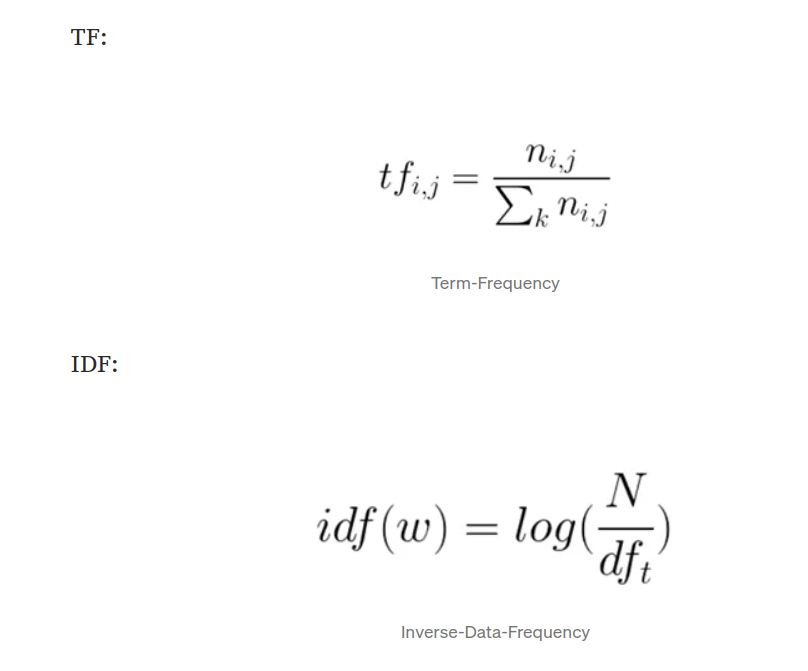




In [ ]:
label_counts = df['Sentiment'].value_counts()
label_counts

-1    23218
 1    22507
 0     3130
Name: Sentiment, dtype: int64

# Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(df.Sentence.values.reshape(-1, 1), df.Sentiment)

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame({'Sentence': X_resampled.flatten(), 'Sentiment': y_resampled})

# Display the resulting DataFrame
print(df_resampled)

                                               Sentence  Sentiment
0                      esi low      bk real possibility         -1
1     shell   billion bg deal meet shareholder skept...         -1
2     ssh communication security corp stock exchange...         -1
3      sap q disappoints  software license  real pro...         -1
4      aapl afternoon selloff usual brutal  get read...         -1
...                                                 ...        ...
2575  operating profit net sale threemonth period in...          1
2576  google  inc completes acquisition icoa  inc ht...          1
2577  loaded  bsx yesterday  looking good  still thi...          1
2578  nokian tyre prof high safety excellently impor...          1
2579         ftse edge investor cheer kingfisher result          1

[2580 rows x 2 columns]


In [ ]:
df_resampled['Sentiment'].value_counts()

-1    860
 0    860
 1    860
Name: Sentiment, dtype: int64

# Data analisis and viualization

In [ ]:
# cheek if there is null values
df.isnull().sum()

In [ ]:
df["Sentiment"].head()

0    1
1   -1
2    1
3    0
4    0
Name: Sentiment, dtype: int64

In [ ]:
unique_Labels = df["Sentiment"].unique()
unique_Labels

array([ 1, -1,  0])

In [ ]:

sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title='Sentiment Distribution')
fig.show()

In [ ]:
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title='Sentiment Distribution')
fig.show()

In [ ]:
# # Create a dictionary from the DataFrame columns
# word_counts = dict(zip(tbl["Word"], tbl["Count"]))

# # Create a WordCloud object with desired configurations
# wordcloud = WordCloud(background_color="white", colormap="seismic")

# # Generate the word cloud using the word counts
# wordcloud.generate_from_frequencies(word_counts)

# # Plot the word cloud with colored text
# plt.figure(figsize=(10, 8))
# plt.imshow(wordcloud, interpolation="none")
# plt.savefig("wordcloud.png", dpi=300)
# plt.axis("off")
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(df["Sentence"])

# Create a word cloud
wordcloud = WordCloud(background_color="white", colormap="seismic")

wordcloud.generate(all_text)

# Plot the word cloud with colored text
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="none")
plt.savefig("wordcloud.png", dpi=300)
plt.axis("off")
plt.show()



# Using Classical machine Learnig models (SVM and NaiveBayes)


## NaiveBayes

why log in tf-idf
[logarithm graph](https://en.wikipedia.org/wiki/Logarithm)

### Using NaiveBayes and  BOW

In [ ]:
df.shape

(48855, 2)

In [ ]:
# Lets try with NaiveBayes model

ML_classical(df,bow = True,model = MultinomialNB()) # multiclassification

Accuracy:  0.84269777914236
Precision:  0.7804939863259109
Recall:  0.8558344477017213
F1-Score:  0.808376556039803
              precision    recall  f1-score   support

          -1       0.86      0.88      0.87     23218
           0       0.60      0.89      0.72      3130
           1       0.88      0.80      0.84     22507

    accuracy                           0.84     48855
   macro avg       0.78      0.86      0.81     48855
weighted avg       0.85      0.84      0.84     48855



### Using Naive Bayes and TFIDF

In [ ]:
# Now lets try with TF-IDF vectorizer instead of bag of words to MultinomialNB().

ML_classical(df, model= MultinomialNB(),TFIDF=True)

Accuracy:  0.8402210623272951
Precision:  0.7883815436786001
Recall:  0.7528179677304317
F1-Score:  0.7679410266602374
              precision    recall  f1-score   support

          -1       0.84      0.90      0.87     23218
           0       0.66      0.54      0.59      3130
           1       0.86      0.82      0.84     22507

    accuracy                           0.84     48855
   macro avg       0.79      0.75      0.77     48855
weighted avg       0.84      0.84      0.84     48855



## SVM

### using SVM (rbf) and BOW

In [ ]:
ML_classical(df, bow =True,model=svm.SVC(kernel='rbf'))

Accuracy:  0.8942585201105312
Precision:  0.8322593834116012
Recall:  0.8291196878561768
F1-Score:  0.83054274927016
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91     23218
           0       0.68      0.67      0.67      3130
           1       0.89      0.92      0.91     22507

    accuracy                           0.89     48855
   macro avg       0.83      0.83      0.83     48855
weighted avg       0.89      0.89      0.89     48855



### SVM and TFIF

In [ ]:
ML_classical(df, TFIDF =True,model=svm.SVC(kernel='rbf'))

Accuracy:  0.9152594412035615
Precision:  0.8487344735002135
Recall:  0.8462714269200414
F1-Score:  0.8473929746906051
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93     23218
           0       0.68      0.68      0.68      3130
           1       0.92      0.94      0.93     22507

    accuracy                           0.92     48855
   macro avg       0.85      0.85      0.85     48855
weighted avg       0.92      0.92      0.92     48855



Precision: **Precision measures the accuracy of the positive predictions made by a model**. It is the ratio of true positives (the number of correctly predicted positive instances) to the sum of true positives and false positives (instances predicted as positive but are actually negative). In simple terms, precision answers the question: "Of all the instances predicted as positive, how many were actually positive?" A higher precision indicates a lower rate of false positives.

Recall: Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all the positive instances correctly. It is the ratio of true positives to the sum of true positives and false negatives (instances predicted as negative but are actually positive). In simple terms, recall answers the question: "Of all the actual positive instances, how many were correctly predicted as positive?" A higher recall indicates a lower rate of false negatives.

# RandomForest

## RandomForest with TFIF.


In [ ]:
ML_classical(df, TFIDF = True ,model = RandomForestClassifier() )

Accuracy:  0.899334766144714
Precision:  0.8242834763213498
Recall:  0.8240235571613436
F1-Score:  0.8241351728506641
              precision    recall  f1-score   support

          -1       0.92      0.91      0.92     23218
           0       0.64      0.64      0.64      3130
           1       0.91      0.92      0.92     22507

    accuracy                           0.90     48855
   macro avg       0.82      0.82      0.82     48855
weighted avg       0.90      0.90      0.90     48855



## RandomForest with BOW

In [ ]:
ML_classical(df, bow = True ,model = RandomForestClassifier() )

# XGboast

## XGboast with TFIDF.

In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
folds        0
dtype: int64

In [ ]:
ML_classical(df , TFIDF = True , model = GradientBoostingClassifier())

Accuracy:  0.7356053628083103
Precision:  0.72048226968999
Recall:  0.6243887522197297
F1-Score:  0.6523203118038595
              precision    recall  f1-score   support

          -1       0.81      0.71      0.75     23218
           0       0.67      0.35      0.46      3130
           1       0.69      0.82      0.75     22507

    accuracy                           0.74     48855
   macro avg       0.72      0.62      0.65     48855
weighted avg       0.74      0.74      0.73     48855



## XGbost with BOW

In [ ]:
ML_classical(df , bow = True , model = GradientBoostingClassifier())

Accuracy:  0.7339269266195886
Precision:  0.7185625865784523
Recall:  0.6232741648334673
F1-Score:  0.6511070423165811
              precision    recall  f1-score   support

          -1       0.80      0.70      0.75     23218
           0       0.67      0.35      0.46      3130
           1       0.69      0.82      0.75     22507

    accuracy                           0.73     48855
   macro avg       0.72      0.62      0.65     48855
weighted avg       0.74      0.73      0.73     48855



# Desion Tree

## Desion Tree with TFIDF

In [ ]:
ML_classical(df , TFIDF = True ,model = tree.DecisionTreeClassifier())

Accuracy:  0.8419199672500256
Precision:  0.7584573326546904
Recall:  0.7560362779190833
F1-Score:  0.7572000098918569
              precision    recall  f1-score   support

          -1       0.87      0.86      0.86     23218
           0       0.55      0.54      0.55      3130
           1       0.86      0.87      0.86     22507

    accuracy                           0.84     48855
   macro avg       0.76      0.76      0.76     48855
weighted avg       0.84      0.84      0.84     48855



## desion tree with BOW

In [ ]:
ML_classical(df , bow= True ,model = tree.DecisionTreeClassifier())

Accuracy:  0.8510694913519599
Precision:  0.7733256858337337
Recall:  0.769798956065845
F1-Score:  0.771516644049164
              precision    recall  f1-score   support

          -1       0.87      0.86      0.87     23218
           0       0.58      0.57      0.58      3130
           1       0.87      0.88      0.87     22507

    accuracy                           0.85     48855
   macro avg       0.77      0.77      0.77     48855
weighted avg       0.85      0.85      0.85     48855



# Tring to make optimization for XGboasting

In [ ]:
def ML_classical_opptmized(df, bow=False, TFIDF=False,
                           model=linear_model.LogisticRegression(solver='liblinear')):
    df['folds'] = -1
    # Shuffle data and reset index
    df = df.sample(frac=1).reset_index(drop=True)

    # Initiate StratifiedKFold object
    np.random.seed(0)
    n_splits = 3
    kf = StratifiedKFold(n_splits=n_splits)

    # Assign each row to its validation set number
    for f, (train, val) in enumerate(kf.split(X=df, y=df.Sentiment)):
        df.loc[val, 'folds'] = f

    # Initialize vectorizer based on representation choice
    if bow:
        vectorizer = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
    elif TFIDF:
        vectorizer = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

    true_labels = []  # Store true labels for all folds
    predicted_labels = []  # Store predicted labels for all folds

    # Perform cross-validation
    for fold in range(n_splits):
        train_df = df[df.folds != fold].reset_index(drop=True)
        test_df = df[df.folds == fold].reset_index(drop=True)

        vectorizer.fit(train_df.Sentence)
        x_train = vectorizer.transform(train_df.Sentence)
        x_test = vectorizer.transform(test_df.Sentence)

        # Define the parameter grid
        param_grid = {
            'learning_rate': [0.1, 0.001],
            'n_estimators': [100, 300],
            'max_depth': [3, 5,]
            # Add other hyperparameters and their ranges as needed
        }

        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=model, n_jobs=-1 , param_grid=param_grid, scoring='accuracy', cv=5)

        # Fit the data to perform grid search
        grid_search.fit(x_train, train_df.Sentiment)

        # Use the best hyperparameters for training
        best_model = grid_search.best_estimator_
        best_model.fit(x_train, train_df.Sentiment)

        preds = best_model.predict(x_test)

        true_labels.extend(test_df.Sentiment)
        predicted_labels.extend(preds)
         # Compute evaluation metrics for the current fold
        accuracy_precision = precision_score(test_df.Sentiment, preds, average='macro')
        accuracy_recall = recall_score(test_df.Sentiment, preds, average='macro')
        accuracy_f1_score = f1_score(test_df.Sentiment, preds, average='macro')
        accuracy = accuracy_score(test_df.Sentiment, preds)

        # Print evaluation metrics for the current fold
        print("Fold:", fold + 1)
        print("Accuracy:", accuracy)
        print("Precision:", accuracy_precision)
        print("Recall:", accuracy_recall)
        print("F1-Score:", accuracy_f1_score)
        print(classification_report(test_df.Sentiment, preds))
        print("-------------------------")

    # Compute evaluation metrics
    accuracy_precision = precision_score(true_labels, predicted_labels, average='macro')
    accuracy_recall = recall_score(true_labels, predicted_labels, average='macro')
    accuracy_f1_score = f1_score(true_labels, predicted_labels, average='macro')
    accuracy = accuracy_score(true_labels, predicted_labels)


    # Print evaluation metrics
    print("Accuracy:" ,accuracy )
    print("Precision: ", accuracy_precision)
    print("Recall: ", accuracy_recall)
    print("F1-Score: ", accuracy_f1_score)
    print(classification_report(true_labels, predicted_labels))

In [ ]:
ML_classical_opptmized(df , TFIDF = True , model= GradientBoostingClassifier())

Fold: 1
Accuracy: 0.696611909650924
Precision: 0.6071485874734973
Recall: 0.5605430936789889
F1-Score: 0.5652810189223788
              precision    recall  f1-score   support

          -1       0.38      0.16      0.23       287
           0       0.71      0.87      0.79      1043
           1       0.72      0.65      0.68       618

    accuracy                           0.70      1948
   macro avg       0.61      0.56      0.57      1948
weighted avg       0.67      0.70      0.67      1948

-------------------------
Fold: 2
Accuracy: 0.7108371854134566
Precision: 0.6207992356582063
Recall: 0.5686139894908687
F1-Score: 0.5732983627790977
              precision    recall  f1-score   support

          -1       0.39      0.15      0.22       286
           0       0.72      0.90      0.80      1044
           1       0.75      0.66      0.70       617

    accuracy                           0.71      1947
   macro avg       0.62      0.57      0.57      1947
weighted avg       0.6

KeyboardInterrupt: ignored

# Ensemble learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB


def ML_classical_ensemble(df, bow=False, TFIDF=False):
    df['folds'] = -1  # Add a column to split data later
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle data and reset index

    # Initiate StratifiedKFold object
    np.random.seed(0)
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits)

    for f, (train, val) in enumerate(kf.split(X=df, y=df.Sentiment)):
        df.loc[val, 'folds'] = f  # Assign each row to its validation set number

    if bow:
        vectorizer = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
    elif TFIDF:
        vectorizer = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

    models = [
    ('logistic_regression', linear_model.LogisticRegression(solver='liblinear')),
    ('svm', svm.SVC(kernel='linear', probability=True)),
    ('random_forest', RandomForestClassifier()),
    ('naive_bayes', GaussianNB()),
    ('xgboost', XGBClassifier()),
    ('decision_tree', DecisionTreeClassifier())
                          ]

    voting_model = VotingClassifier(models, voting='soft')

    true_labels = []  # Store true labels for all folds
    predicted_labels = []  # Store predicted labels for all folds

    for fold in range(n_splits):
        train_df = df[df.folds != fold].reset_index(drop=True)
        test_df = df[df.folds == fold].reset_index(drop=True)

        vectorizer.fit(train_df.Sentence)
        x_train = vectorizer.transform(train_df.Sentence)
        x_test = vectorizer.transform(test_df.Sentence)

        voting_model.fit(x_train, train_df.Sentiment)
        preds = voting_model.predict(x_test)

        true_labels.extend(test_df.Sentiment)
        predicted_labels.extend(preds)

    accuracy_precision = precision_score(true_labels, predicted_labels, average='macro')
    accuracy_recall = recall_score(true_labels, predicted_labels, average='macro')
    accuracy_f1_score = f1_score(true_labels, predicted_labels, average='macro')
    accuracy = accuracy_score(true_labels, predicted_labels)

    joblib.dump(voting_model, dir + 'EnsembleModel.h5')
    print("Accuracy: ", accuracy)
    print("Precision: ", accuracy_precision)
    print("Recall: ", accuracy_recall)
    print("F1-Score: ", accuracy_f1_score)
    print(classification_report(true_labels, predicted_labels))


In [ ]:
ML_classical_ensemble(df , TFIDF = True  )

# perform grid search to models to get best accuracy and best hyperparameters

In [ ]:

def ML_classical_GS(df, bow=False, TFIDF=False):
    df['folds'] = -1  # Add a column to split data later
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle data and reset index

    # Initiate StratifiedKFold object
    np.random.seed(0)
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits)

    for f, (train, val) in enumerate(kf.split(X=df, y=df.Sentiment)):
        df.loc[val, 'folds'] = f  # Assign each row to its validation set number

    if bow:
        vectorizer = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
    elif TFIDF:
        vectorizer = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

    models = [
        ('logistic_regression', LogisticRegression(solver='liblinear' , max_iter=1000 )),
        ('svm', svm.SVC(kernel='linear', probability=True)),
        ('random_forest', RandomForestClassifier()),
        ('gradient_boosting', GradientBoostingClassifier()),
    ]

    best_model = None
    best_accuracy = 0.0

    for name, model in models:
        param_grid = get_param_grid(name)  # Get the hyperparameter grid for the specific model

        # Perform GridSearchCV with the given model and hyperparameter grid
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=n_splits)

        for fold in range(n_splits):
            # Fit the vectorizer on the training data
            vectorizer.fit(df.loc[df.folds != fold, 'Sentence'])

            # Transform the training and test data
            x_train = vectorizer.transform(df.loc[df.folds != fold, 'Sentence'])
            x_test = vectorizer.transform(df.loc[df.folds == fold, 'Sentence'])

            grid_search.fit(x_train, df.loc[df.folds != fold, 'Sentiment'])

            # Retrieve the best model and its accuracy
            best_estimator = grid_search.best_estimator_
            accuracy = grid_search.best_score_

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = best_estimator

    joblib.dump(best_model, dir + 'BestModel.h5')
    print("Best Model Accuracy: ", best_accuracy)

def get_param_grid(model_name):
    if model_name == 'logistic_regression':
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'penalty': ['l1', 'l2']
        }
    elif model_name == 'svm':
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        }
    elif model_name == 'random_forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        }
    elif model_name == 'gradient_boosting':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10]
        }
    else:
        param_grid = {}
    return param_grid

In [ ]:
ML_classical_GS(df , TFIDF = True )

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Sequence Models and Transfer Learnig

### text preprosessing for deep learning

In [ ]:
# loading pretrained word2vec embedding 300D "GoogleNews Word2Vec embeddings" =
# loading the words (vectors) that have been trained with word2vec

word2vec_pretrained = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/AI-projects/SentimentAnalysis/GoogleNews-vectors-negative300.bin.gz",binary=True)

In [ ]:
word2vec_pretrained_dict = dict(zip(word2vec_pretrained.key_to_index.keys(),word2vec_pretrained.vectors))

In [ ]:
Example_word = "Apple"
Example_vector = word2vec_pretrained[Example_word]

In [ ]:
print(Example_word,"vector =",Example_vector)

Apple vector = [-1.74804688e-01  3.00292969e-02 -2.16796875e-01  1.56250000e-01
 -3.57421875e-01 -6.05468750e-02  1.36718750e-01  9.57031250e-02
  3.17382812e-03 -4.29687500e-02 -3.30078125e-01  2.57812500e-01
  2.51953125e-01 -2.77343750e-01 -6.98242188e-02 -2.95410156e-02
  3.22265625e-01 -7.76367188e-02 -3.06396484e-02 -1.67968750e-01
 -5.76171875e-02  3.05175781e-02  5.52368164e-03 -1.26953125e-01
 -1.44042969e-02  1.75781250e-01  9.47265625e-02  3.16406250e-01
 -7.81250000e-03 -3.40270996e-03  3.63769531e-02  1.11816406e-01
 -1.24023438e-01  1.29882812e-01 -3.22265625e-02 -1.60156250e-01
  7.56835938e-02  6.73828125e-02  4.08203125e-01  2.23632812e-01
  1.60156250e-01  3.63769531e-02 -1.64062500e-01 -3.51562500e-01
  4.49218750e-02  6.34765625e-02 -1.15234375e-01  3.12500000e-01
 -2.80761719e-02 -9.22851562e-02  5.98144531e-02  1.57470703e-02
 -1.15234375e-01  2.18750000e-01 -5.78613281e-02  2.07031250e-01
 -1.03515625e-01 -2.07031250e-01 -7.08007812e-02 -7.47070312e-02
  1.357421

In [ ]:
Example_vector.shape

(300,)

In [ ]:
list(word2vec_pretrained_dict.values())[0].shape

(300,)

In [ ]:
word2vec_pretrained_dict["ero"]

array([ 0.00836182, -0.11669922,  0.11035156,  0.07177734, -0.02087402,
        0.09375   ,  0.07910156, -0.22265625, -0.00714111,  0.06445312,
       -0.19628906, -0.05200195, -0.16503906,  0.0480957 , -0.18847656,
        0.19921875, -0.05224609,  0.33398438, -0.01501465,  0.04125977,
       -0.23242188, -0.04858398,  0.0098877 , -0.00338745, -0.15625   ,
       -0.23730469, -0.1640625 ,  0.03039551, -0.17285156, -0.07666016,
       -0.12988281,  0.04736328,  0.12695312, -0.10742188, -0.22363281,
       -0.01330566, -0.09716797,  0.03808594,  0.13574219, -0.08154297,
       -0.04882812, -0.01916504, -0.07714844,  0.20214844, -0.06884766,
       -0.10498047, -0.00921631, -0.15136719, -0.0703125 ,  0.046875  ,
       -0.10742188,  0.17285156, -0.01507568,  0.16796875, -0.0168457 ,
        0.21386719, -0.01977539,  0.0859375 , -0.00662231, -0.10009766,
       -0.15917969,  0.09082031, -0.08105469, -0.01507568, -0.07910156,
       -0.29492188,  0.09667969, -0.13867188,  0.21289062,  0.07

In [ ]:
df['Sentence'] = df['Sentence'].apply(preprocessing_text)

X_train,X_test,y_train,y_test = train_test_split(df.Sentence, df.Sentiment, test_size = 0.18,
                                                 random_state = 48, stratify= df.Sentiment, shuffle = True)

In [ ]:
# One hot Encodring convert, to pass to word2vec
y_train_enc = to_categorical.to_categorical(y_train, 3)
y_test_enc = to_categorical.to_categorical(y_test, 3)
# output_examples = [1,0,0],[0,1,0],[0,0,1]

In [ ]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=None)

token.fit_on_texts(list(X_train) + list(X_test)) # fits tokens on texts
xtrain_seq = token.texts_to_sequences(X_train) # text to sequences converts the sentence words to number sequences
xtest_seq = token.texts_to_sequences(X_test)

#zero pad sequences
xtrain_pad = pad_sequences(xtrain_seq,padding='post') # zero padding all sentences to have the same shape as the largest one
xtest_pad = pad_sequences(xtest_seq,padding='post')

word_index = token.word_index # returns the word index that have been tokenized

In [ ]:
print(word_index)

{'eur': 1, 'company': 2, 'mn': 3, 'sale': 4, 'profit': 5, 'finnish': 6, 'share': 7, 'said': 8, 'net': 9, 'million': 10, 'year': 11, 'operating': 12, 'mln': 13, 'period': 14, 'group': 15, 'finland': 16, 'quarter': 17, 'market': 18, 'service': 19, 'euro': 20, 'new': 21, 'http': 22, 'business': 23, 'oyj': 24, 'first': 25, 'loss': 26, 'also': 27, 'today': 28, 'compared': 29, 'price': 30, 'product': 31, 'helsinki': 32, 'operation': 33, 'contract': 34, 'corresponding': 35, 'solution': 36, 'percent': 37, 'bank': 38, 'total': 39, 'per': 40, 'stock': 41, 'system': 42, 'result': 43, 'unit': 44, 'plant': 45, 'financial': 46, 'order': 47, 'not': 48, 'decreased': 49, 'investment': 50, 'nokia': 51, 'customer': 52, 'report': 53, 'technology': 54, 'hel': 55, 'corporation': 56, 'capital': 57, 'according': 58, 'pct': 59, 'production': 60, 'project': 61, 'u': 62, 'well': 63, 'increased': 64, 'month': 65, 'mobile': 66, 'increase': 67, 'value': 68, 'last': 69, 'earlier': 70, 'industry': 71, 'third': 72, 'e

In [ ]:
print(xtrain_seq[0])

[105, 5, 2, 64, 860, 1031, 529]


In [ ]:
#create embedding matrix for words that we have in dataset

embedding_matrix = np.zeros((len(word_index)+1, 300))
for word,i in word_index.items():
    embedding_vector = word2vec_pretrained_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# Build Custom Metrics (F1-Score)


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m_():
    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_m


## LSTM

### Using LSTM and word2vec

In [ ]:
model = Sequential()

#input Layers
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     trainable=False))
#hedden Layers
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

#output layer , 3 lebals
model.add(Dense(3))

model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = [f1_m_() , precision_m() ,recall_m ,"accuracy"  ])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

history = model.fit(xtrain_pad, y=y_train_enc, batch_size=512, epochs=100,
          verbose=1, validation_data = (xtest_pad, y_test_enc), callbacks=[earlystop])

Epoch 1/100
10/10 [==============================] - 19s 2s/step - loss: 1.0342 - f1_m: 0.1748 - val_loss: 0.9701 - val_f1_m: 0.4831
Epoch 2/100
10/10 [==============================] - 15s 1s/step - loss: 0.9583 - f1_m: 0.4576 - val_loss: 0.9728 - val_f1_m: 0.4713
Epoch 3/100
10/10 [==============================] - 15s 1s/step - loss: 0.9093 - f1_m: 0.4798 - val_loss: 0.8773 - val_f1_m: 0.4648
Epoch 4/100
10/10 [==============================] - 15s 1s/step - loss: 0.8842 - f1_m: 0.5099 - val_loss: 0.8796 - val_f1_m: 0.5244
Epoch 5/100
10/10 [==============================] - 15s 1s/step - loss: 0.8827 - f1_m: 0.4927 - val_loss: 0.8560 - val_f1_m: 0.5108
Epoch 6/100
10/10 [==============================] - 15s 1s/step - loss: 0.8500 - f1_m: 0.5369 - val_loss: 0.8958 - val_f1_m: 0.5520
Epoch 7/100
10/10 [==============================] - 15s 1s/step - loss: 0.8514 - f1_m: 0.5547 - val_loss: 0.8098 - val_f1_m: 0.5587
Epoch 8/100
10/10 [==============================] - 15s 1s/step - lo

In [ ]:
# Saving the model for Future Inferences
model_json = model.to_json()
with open(dir_models+"LSTM_word2vec.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(dir_models+"LSTM_word2vec.h5")

## Transfer Learning with (**BERT and GPT-2**)

### BERT


In [ ]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.CategoricalCrossentropy()
# Here we can add our needed matrices like
# metrics = [
#     tf.keras.metrics.CategoricalAccuracy(),
#     tf.keras.metrics.Precision(),
#     tf.keras.metrics.Recall(),
#     tf.keras.metrics.AUC(name='auc'),
#     tf.keras.metrics.TruePositives(),
#     tf.keras.metrics.FalsePositives(),
#     tf.keras.metrics.TrueNegatives(),
#     tf.keras.metrics.FalseNegatives()
# ]
#metrics = [tf.keras.metrics.CategoricalAccuracy()]
metrics = [f1_m_() , tf.keras.metrics.Precision() ,recall_m ,"accuracy"]

In [ ]:
# Define the model inputs and outputs
input_ids = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='attention_mask')
output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

# Add a dense layer with softmax activation for classification
output = tf.keras.layers.Dense(3, activation='softmax')(output)

In [ ]:
# Define the model
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model.summary()

In [ ]:
# Define the training and validation datasets

def datasets(tokenizer):

    # Split the data into training and validation sets
    train_df, val_df, train_labels, val_labels = train_test_split(df.Sentence, df.Sentiment,
                                                                  test_size=0.2, random_state=42,stratify = df.Sentiment)

    # Tokenize the input sequences and convert to input IDs and attention masks
    train_encodings = tokenizer(list(train_df.values), truncation=True, padding=True,max_length=98)
    train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
    train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']}, train_labels))

    val_encodings = tokenizer(list(val_df.values), truncation=True, padding=True,max_length=98)
    val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)
    val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}, val_labels))


    # Batch and shuffle the datasets
    batch_size = 32
    train_dataset = train_dataset.batch(batch_size).shuffle(1000)
    val_dataset = val_dataset.batch(batch_size)

    return train_dataset,val_dataset

In [ ]:
# Define the training and validation datasets

train_dataset,val_dataset = datasets(tokenizer)

In [ ]:
train_dataset

<_ShuffleDataset element_spec=({'input_ids': TensorSpec(shape=(None, 63), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 63), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
# Train the model for a few epochs
num_epochs = 3
model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs)

Epoch 1/3


ValueError: ignored

### BERT and RoBERTa

In [ ]:
# Load the RoBERTa tokenizer and model
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
# Define the training and validation datasets

train_dataset,val_dataset = datasets(roberta_tokenizer)

In [ ]:

# Define the input shape for the model
max_length = 98

# Define the custom top layer for classification
num_labels = 3
top_layer = tf.keras.layers.Dense(num_labels, activation='softmax')

# Define the RoBERTa model with the custom top layer
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
roberta_output = roberta_model({'input_ids': input_ids, 'attention_mask': attention_mask})
roberta_output = roberta_output.last_hidden_state[:, 0, :]
roberta_output = top_layer(roberta_output)
roberta_model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=[roberta_output])

print(roberta_model.summary())

# Define the loss function and metrics for training
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy()]
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

# Compile the RoBERTa model for training
roberta_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


# Train the RoBERTa model on the sentiment analysis task
roberta_model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 98)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 98)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['attention_mask[0][0]',         
 el)                            thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 98,                                          

ValueError: ignored

#Bert_with_roberta. **vm**

In [ ]:
dir = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/data.csv"

In [ ]:
# !pip install transformers

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from transformers import (pipeline , BertTokenizer,
                          TFBertForSequenceClassification,
                          InputExample, InputFeatures ,
                         AutoTokenizer, TFAutoModelForSequenceClassification,
                         TFRobertaModel, TFGPT2Model, RobertaTokenizer, GPT2Tokenizer)

In [ ]:
# df = pd.read_csv(dir)

# dicto = {'positive': 1, 'neutral': 0 , 'negative': -1}

# df.Sentiment = df.Sentiment.map(dicto)

In [ ]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy()]

In [ ]:
# Define the model inputs and outputs
input_ids = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='attention_mask')
output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

# Add a dense layer with softmax activation for classification
output = tf.keras.layers.Dense(3, activation='softmax')(output)

In [ ]:
# Define the model
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [ ]:
# Define the training and validation datasets

def datasets(tokenizer):

    # Split the data into training and validation sets
    train_df, val_df, train_labels, val_labels = train_test_split(df.Sentence, df.Sentiment,
                                                                  test_size=0.2, random_state=42,stratify = df.Sentiment)

    # Tokenize the input sequences and convert to input IDs and attention masks
    train_encodings = tokenizer(list(train_df.values), truncation=True, padding=True,max_length=98)
    train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
    train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']}, train_labels))

    val_encodings = tokenizer(list(val_df.values), truncation=True, padding=True,max_length=98)
    val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)
    val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}, val_labels))


    # Batch and shuffle the datasets
    batch_size = 32
    train_dataset = train_dataset.batch(batch_size).shuffle(1000)
    val_dataset = val_dataset.batch(batch_size)

    return train_dataset,val_dataset

In [ ]:
# Load the RoBERTa tokenizer and model
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
# Define the training and validation datasets

train_dataset,val_dataset = datasets(roberta_tokenizer)

In [ ]:
# Define the input shape for the model
max_length = 98

# Define the custom top layer for classification
num_labels = 3
top_layer = tf.keras.layers.Dense(num_labels, activation='softmax')

# Define the RoBERTa model with the custom top layer
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
roberta_output = roberta_model({'input_ids': input_ids, 'attention_mask': attention_mask})
roberta_output = roberta_output.last_hidden_state[:, 0, :]
roberta_output = top_layer(roberta_output)
roberta_model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=[roberta_output])

print(roberta_model.summary())

# Define the loss function and metrics for training
loss = tf.keras.losses.CategoricalCrossentropy()
# Here we can add our needed matrices like
# metrics = [
#     tf.keras.metrics.CategoricalAccuracy(),
#     tf.keras.metrics.Precision(),
#     tf.keras.metrics.Recall(),
#     tf.keras.metrics.AUC(name='auc'),
#     tf.keras.metrics.TruePositives(),
#     tf.keras.metrics.FalsePositives(),
#     tf.keras.metrics.TrueNegatives(),
#     tf.keras.metrics.FalseNegatives()
# ]

metrics = [tf.keras.metrics.CategoricalAccuracy()]
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

# Compile the RoBERTa model for training
roberta_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)




# Train the RoBERTa model on the sentiment analysis task
roberta_model.fit(train_dataset, epochs=3, validation_data=val_dataset)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 98)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 98)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['attention_mask[0][0]',         
 el)                            thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 98,                                          

 598/1222 [=============>................] - ETA: 6:45:51 - loss: 0.5064 - categorical_accuracy: 0.7856

 - **147/147 : This bold text** indicates that the training process has completed 147 batches. It represents the progress of training through the available training data.

- **[==============================]**: This progress bar represents the completion of the batches. Each "=" symbol represents the completion of one batch.

- **3694s 25s/step**: The training process took approximately 3694 seconds (or about 61.57 minutes) to complete all the batches. The "25s/step" indicates the average time taken for each training step.
- **loss: 0.2756:** The training loss at the end of the epoch is 0.2756. The loss value indicates the discrepancy between the predicted and actual values during training. Lower values indicate better model performance.

- **categorical_accuracy: 0.8566:** The training accuracy at the end of the epoch is 0.8566. This metric represents the percentage of correctly predicted labels for the training data.

- **val_loss: 0.4078:** The validation loss at the end of the epoch is 0.4078. This loss value is calculated on a separate validation dataset and provides an indication of how well the model generalizes to unseen data.

- **val_categorical_accuracy: 0.8246:** The validation accuracy at the end of the epoch is 0.8246. This metric represents the percentage of correctly predicted labels for the validation data.

- **<keras.callbacks.History at 0x7f78bb4c5600>:** This line indicates that the training history object has been returned. It is typically assigned to a variable and can be used to analyze the training progress or plot learning curves.

In [ ]:
# Saving the model for Future Inferences
dir_models = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/"
from tensorflow.keras.models import model_from_json

model_json = roberta_model.to_json()
with open(dir_models+"roberta_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
roberta_model.save_weights(dir_models+"roberta_model.h5")

# Bert new **VM**

In [ ]:
dir = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/data.csv"

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from transformers import (pipeline , BertTokenizer,
                          TFBertForSequenceClassification,
                          InputExample, InputFeatures ,
                         AutoTokenizer, TFAutoModelForSequenceClassification,
                         TFRobertaModel, TFGPT2Model, RobertaTokenizer, GPT2Tokenizer)

In [ ]:
df = pd.read_csv(dir)

dicto = {'positive': 1, 'neutral': 0 , 'negative': -1}

df.Sentiment = df.Sentiment.map(dicto)

In [ ]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy()]

In [ ]:
# Define the model inputs and outputs
input_ids = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(98,), dtype=tf.int32, name='attention_mask')
output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

# Add a dense layer with softmax activation for classification
output = tf.keras.layers.Dense(3, activation='softmax')(output)

In [ ]:
# Define the model
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 98)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 98)]         0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  109484547  ['attention_mask[0][0]',         
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'input_ids[0][0]']              
 fication)                      logits=(None, 3),                                                 
                                 hidden_states=None                                           

In [ ]:
# Define the training and validation datasets

def datasets(tokenizer):

    # Split the data into training and validation sets
    train_df, val_df, train_labels, val_labels = train_test_split(df.Sentence, df.Sentiment,
                                                                  test_size=0.2, random_state=42,stratify = df.Sentiment)

    # Tokenize the input sequences and convert to input IDs and attention masks
    train_encodings = tokenizer(list(train_df.values), truncation=True, padding=True,max_length=98)
    train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
    train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']}, train_labels))

    val_encodings = tokenizer(list(val_df.values), truncation=True, padding=True,max_length=98)
    val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)
    val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}, val_labels))


    # Batch and shuffle the datasets
    batch_size = 32
    train_dataset = train_dataset.batch(batch_size).shuffle(1000)
    val_dataset = val_dataset.batch(batch_size)

    return train_dataset,val_dataset

In [ ]:
# Define the training and validation datasets

train_dataset,val_dataset = datasets(tokenizer)

In [ ]:
train_dataset

In [ ]:
# Train the model for a few epochs
num_epochs = 3
model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs)

Epoch 1/3
147/147 [==============================] - 5680s 38s/step - loss: 0.7878 - categorical_accuracy: 0.6670 - val_loss: 0.5487 - val_categorical_accuracy: 0.7819
Epoch 2/3
147/147 [==============================] - 5224s 36s/step - loss: 0.4406 - categorical_accuracy: 0.8162 - val_loss: 0.4515 - val_categorical_accuracy: 0.7998
Epoch 3/3
147/147 [==============================] - 5233s 36s/step - loss: 0.3014 - categorical_accuracy: 0.8568 - val_loss: 0.4694 - val_categorical_accuracy: 0.7836


In [ ]:
# Saving the model for Future Inferences
dir_models = "/content/drive/MyDrive/AI-projects/SentimentAnalysis/"
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open(dir_models+"Bert.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(dir_models+"Bert.h5")

# GPT-2 ( Transfer Learning )

In [ ]:
# Load the GPT-2 tokenizer and model
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = TFGPT2Model.from_pretrained('gpt2')

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
# Define the training and validation datasets

# Set pad_token
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

train_dataset,val_dataset = datasets(gpt2_tokenizer)

In [ ]:
# Define the input shape for the model
max_length = 98

# Define the custom top layer for classification
num_labels = 3
top_layer = tf.keras.layers.Dense(num_labels, activation='softmax')

# Define the GPT-2 model with the custom top layer
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
gpt2_output = gpt2_model(input_ids)[0]
gpt2_output = gpt2_output[:, -1, :]
gpt2_output = top_layer(gpt2_output)
gpt2_model = tf.keras.models.Model(inputs=input_ids, outputs=gpt2_output)

# Define the loss function and metrics for training
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy()]
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

# Compile the GPT-2 model for training
gpt2_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


# Train the GPT-2 model on the sentiment analysis task
gpt2_model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Epoch 1/3


/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


147/147 [==============================] - 2001s 13s/step - loss: 1.1850 - categorical_accuracy: 0.4800 - val_loss: 0.9770 - val_categorical_accuracy: 0.5338
Epoch 2/3
147/147 [==============================] - 1925s 13s/step - loss: 1.0113 - categorical_accuracy: 0.5087 - val_loss: 0.9935 - val_categorical_accuracy: 0.5535
Epoch 3/3
147/147 [==============================] - 1954s 13s/step - loss: 0.9545 - categorical_accuracy: 0.5632 - val_loss: 0.8883 - val_categorical_accuracy: 0.6279
